### Bài toán dự đoán giá nhà tại Bengaluru

In [1]:
# Những thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# In ra 5 hàng đầu tiên của dữ liệu
df = pd.read_csv('D:\\House_predict\\data\\Bengaluru_House_Data.csv')
df.head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


### Tổng quan các trường trong dataset
area_type : Loại bất động sản

availability : Tình trạng của bất động sản

location : Vị trí, khu vực của bất động sản

size : Quy mô, kích thước thường là số phòng ngủ cho 1 căn nhà

society : Tên tổ dân phố nơi toạ lạc của các căn nhà

total_sqft : Tổng diện tích tính bằng đơn vị feet vuông

bath : Số lượng phòng tắm của các căn nhà

balcony : Số lượng ban công

price : GIá bán tính bằng đơn vị Lakh




### Quá trình xử lí dữ liệu
kích thước của dữ liệu xử lí

In [3]:
df.shape


(13320, 9)

Thông tin của các trường dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Dữ liệu khuyết thiếu trong các cột

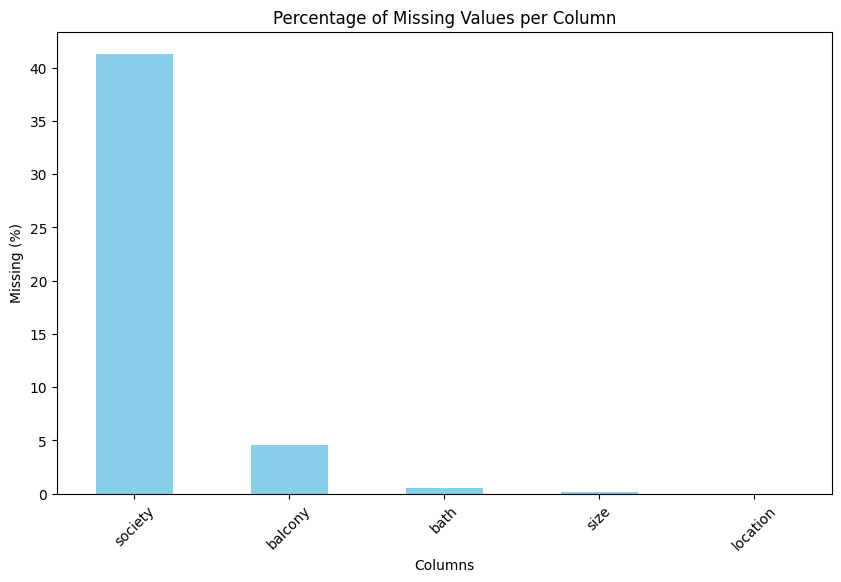

In [5]:
missing_pct = df.isnull().sum() / len(df) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
missing_pct.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Missing (%)")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Biểu đồ phân bố giá nhà')

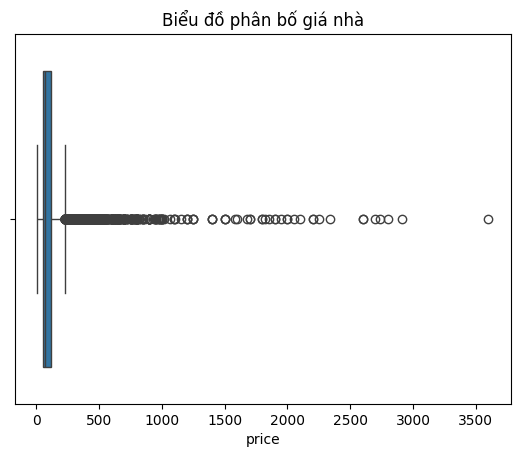

In [6]:
# biểu đồ phân bố giá nhà
sns.boxplot(x=df['price'])
plt.title('Biểu đồ phân bố giá nhà')

Kiểm tra các dữ liệu khuyết thiếu trong dataset

In [7]:
for col in df: # duyệt để tính phần trăm dữ liệu bị khuyết thiếu cho từng cột
  miss_data = df[col].isna().sum()
  miss_per = miss_data/len(df)*100
  print(f"Cột {col} tỉ lệ khuyết thiếu dữ liệu {miss_per}%")

Cột area_type tỉ lệ khuyết thiếu dữ liệu 0.0%
Cột availability tỉ lệ khuyết thiếu dữ liệu 0.0%
Cột location tỉ lệ khuyết thiếu dữ liệu 0.0075075075075075074%
Cột size tỉ lệ khuyết thiếu dữ liệu 0.12012012012012012%
Cột society tỉ lệ khuyết thiếu dữ liệu 41.306306306306304%
Cột total_sqft tỉ lệ khuyết thiếu dữ liệu 0.0%
Cột bath tỉ lệ khuyết thiếu dữ liệu 0.5480480480480481%
Cột balcony tỉ lệ khuyết thiếu dữ liệu 4.572072072072072%
Cột price tỉ lệ khuyết thiếu dữ liệu 0.0%


Do cột society có dữ liệu khuyết thiếu trên 40% nó sẽ ảnh hưởng đến quá trình train nên ta sẽ xoá nó còn các balcony, bath, size, total_sqft tỉ lệ khuyết thiếu thấp nên vẫn có thể giữ lại

In [8]:
# Xoá các cột không cần thiết
df.drop(columns= ['area_type', 'availability', 'society', 'balcony'], inplace = True)

In [9]:
df.head()
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
df['location'].isna().sum()
df['location'] = df['location'].fillna('Sarjapur  Road')


Điền đầy dữ liệu thiếu bằng giá trị trung vị và giá trị phổ biến nhất

In [12]:
# Điền bằng mode (giá trị xuất hiện nhiều nhất)
df['size']=df['size'].fillna('2 BHK')
df['bath'] = df['bath'].fillna(df['bath']).median()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


Kiểm tra lại xem còn dữ liệu khuyết thiếu hay không

In [14]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,2.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,2.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Xử lí dữ liệu trong cột total_sqft

In [16]:
# in ra các giá trị duy nhất trong cột
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [17]:
# lọc giá trị nhiễu
# sử dụng hàm is_numeric để có thể convert những giá trị thuần là số sẽ về float (do cột total_sqft nó có kiểu dữ liệu là object)
def is_numeric(val):
    try:
        float(val)
        return True
    except:
        return False

In [18]:
# apply
non_numeric_values = df[~df['total_sqft'].apply(is_numeric)]['total_sqft'].unique()

In [19]:
print("Các giá trị gây nhiễu trong cột 'total_sqft':")
for val in non_numeric_values:
    print(repr(val))

Các giá trị gây nhiễu trong cột 'total_sqft':
'2100 - 2850'
'3010 - 3410'
'2957 - 3450'
'3067 - 8156'
'1042 - 1105'
'1145 - 1340'
'1015 - 1540'
'1520 - 1740'
'34.46Sq. Meter'
'1195 - 1440'
'1200 - 2400'
'4125Perch'
'1120 - 1145'
'4400 - 6640'
'3090 - 5002'
'4400 - 6800'
'1160 - 1195'
'1000Sq. Meter'
'4000 - 5249'
'1115 - 1130'
'1100Sq. Yards'
'520 - 645'
'1000 - 1285'
'3606 - 5091'
'650 - 665'
'633 - 666'
'5.31Acres'
'30Acres'
'1445 - 1455'
'884 - 1116'
'850 - 1093'
'1440 - 1884'
'716Sq. Meter'
'547.34 - 827.31'
'580 - 650'
'3425 - 3435'
'1804 - 2273'
'3630 - 3800'
'660 - 670'
'1500Sq. Meter'
'620 - 933'
'142.61Sq. Meter'
'2695 - 2940'
'2000 - 5634'
'1574Sq. Yards'
'3450 - 3472'
'1250 - 1305'
'670 - 980'
'1005.03 - 1252.49'
'1004 - 1204'
'361.33Sq. Yards'
'645 - 936'
'2710 - 3360'
'2249.81 - 4112.19'
'3436 - 3643'
'2830 - 2882'
'596 - 804'
'1255 - 1863'
'1300 - 1405'
'1500 - 2400'
'117Sq. Yards'
'934 - 1437'
'980 - 1030'
'1564 - 1850'
'1446 - 1506'
'1070 - 1315'
'3040Sq. Meter'
'500Sq.

Qua quá trình kiểm tra trên có thể thấy rằng trong cột có nhiều giá trị không đơn thuần là số nên ta không thể convert trực tiếp về số cần phải xử lí trước

In [20]:
# hàm tiền xử lí dữ liệu
def convert_sqft_to_num(x):
    if_split = x.split('-') # các giá trị có dạng '1000 - 2000' thì sẽ tính trung bình
    if len(if_split) == 2:
        return np.average([float(if_split[0]), float(if_split[1])])
    try:
        return float(x)
    except:  # Giá trị dạng '188.89Sq. Yards' '204Sq. Meter' thì sẽ không xử lí
        return None

In [21]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num) # Áp dụng cho toàn bộ cột

In [22]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,2.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,2.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00


In [23]:
df.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [24]:
df = df.dropna(subset=['total_sqft'])  # Loại bỏ dòng có diện tích không hợp lệ

In [25]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [26]:
df.describe()

,total_sqft,bath,price
count,13274.000000,13274.0,13274.000000
mean,1559.626694,2.0,112.453654
std,1238.405258,0.0,149.070368
min,1.000000,2.0,8.000000
25%,1100.000000,2.0,50.000000
50%,1276.000000,2.0,72.000000
75%,1680.000000,2.0,120.000000
max,52272.000000,2.0,3600.000000


Tiền xử lí cho cột size

In [27]:
# lọc các giá trị duy nhất trong cột size
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Chọn ra những giá trị duy nhất trong size thì ta có thể thấy nhiều điều đáng ngờ, vấn đề ở đây đặt ra là tại sao 1 căn nhà có nhiều phòng như vậy vì thể ta sẽ chọn nhưng giá trị đáng ngờ để kiểm tra xem nó có thuộc những giá trị Outliers hay không

In [28]:
# Chọn ra những giá trị đáng nghi là outliers
selected_rows = df.loc[df['size'].isin(['9 BHK',
'8 BHK',
'11 BHK',
'11 Bedroom',
'10 BHK',
'14 BHK',
'13 BHK',
'12 Bedroom',
'27 BHK',
'43 Bedroom',
'16 BHK',
'19 BHK',
'18 Bedroom'])]
selected_rows

,location,size,total_sqft,bath,price
459,1 Giri Nagar,11 BHK,5000.0,2.0,360.0
538,Mico Layout,9 BHK,5000.0,2.0,210.0
1718,2Electronic City Phase II,27 BHK,8000.0,2.0,230.0
1768,1 Ramamurthy Nagar,11 Bedroom,1200.0,2.0,170.0
3096,Jp nagar 8th Phase .,10 BHK,12000.0,2.0,525.0
3379,1Hanuman Nagar,19 BHK,2000.0,2.0,490.0
3609,Koramangala Industrial Layout,16 BHK,10000.0,2.0,550.0
3853,1 Annasandrapalya,11 Bedroom,1200.0,2.0,150.0
4585,4th Block Koramangala,9 BHK,4500.0,2.0,500.0
4684,Munnekollal,43 Bedroom,2400.0,2.0,660.0


Sau khi chọn các giá trị nghi ngờ là ngoại lai thì ta có thể thấy số phòng tắm theo số tương ứng với số phòng ngủ là tương đương nhau thì ta có thể hiểu đó có thể là 1 căn chung cư hoặc nhà cao tầng

In [29]:
# Ta sẽ tách riêng 1 cột bhk (số phòng)
df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))
df.head(20)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,2.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,2.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,2.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,2.0,600.00,4
8,Marathahalli,3 BHK,1310.0,2.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,2.0,370.00,6


In [30]:
df.describe()


,total_sqft,bath,price,bhk
count,13274.000000,13274.0,13274.000000,13274.000000
mean,1559.626694,2.0,112.453654,2.801718
std,1238.405258,0.0,149.070368,1.291591
min,1.000000,2.0,8.000000,1.000000
25%,1100.000000,2.0,50.000000,2.000000
50%,1276.000000,2.0,72.000000,3.000000
75%,1680.000000,2.0,120.000000,3.000000
max,52272.000000,2.0,3600.000000,43.000000


Để cho việc loại bỏ outliers tốt hơn ta sẽ tiếp tục tính giá tiền trên/đơn vị diện tích để phân tích xem giá có cao hay thấp bất thường hay ko

In [31]:
df['price_per_sqft'] = df['price'] * 100000 / df["total_sqft"] # đổi đơn vị Lakhs sang đơn vị tiền tệ ấn độ
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,2.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,2.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,2.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,2.0,488.00,4,10407.336319


In [32]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13274.0,13274.000000,13274.000000,1.327400e+04
mean,1559.626694,2.0,112.453654,2.801718,7.907501e+03
std,1238.405258,0.0,149.070368,1.291591,1.064296e+05
min,1.000000,2.0,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.0,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.0,72.000000,3.000000,5.434306e+03
75%,1680.000000,2.0,120.000000,3.000000,7.311746e+03
max,52272.000000,2.0,3600.000000,43.000000,1.200000e+07


Giảm chiều location để việc nhóm giá cả dễ dàng hơn

In [33]:
df['location'] = df['location'].apply(lambda x:x.strip()) # Xoá khoảng trắng đồng nhất dữ liệu
df_loc_count = df['location'].value_counts()
df_loc_count


location
Whitefield                               539
Sarjapur  Road                           400
Electronic City                          304
Kanakpura Road                           271
Thanisandra                              236
                                        ... 
Kanakapura main  Road                      1
Masjid e Alkareem                          1
Sindhi Colony                              1
Bidere Agarahara, Behind Safal market      1
Maruthi nagar kogilu                       1
Name: count, Length: 1288, dtype: int64

In [34]:
loc_count_less_10 = df_loc_count[df_loc_count <= 10]
df['location'] = df['location'].apply(lambda x: 'other' if x in loc_count_less_10 else x)

In [35]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13274.0,13274.000000,13274.000000,1.327400e+04
mean,1559.626694,2.0,112.453654,2.801718,7.907501e+03
std,1238.405258,0.0,149.070368,1.291591,1.064296e+05
min,1.000000,2.0,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.0,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.0,72.000000,3.000000,5.434306e+03
75%,1680.000000,2.0,120.000000,3.000000,7.311746e+03
max,52272.000000,2.0,3600.000000,43.000000,1.200000e+07


In [36]:
# Tính diện tích trên từng phòng để kiểm tra giá trị outliers

((df['total_sqft']/df['bhk']).describe())

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

Sau khi tính diện tích phòng thì qua mô tả thấy giá trị diện tích nhỏ nhất là 0.25 feet vuông , giá trị đó rất vô lí vì chả có căn phòng nào có diện tích nhỏ như vậy , diện tích hợp lệ thường phải khoảng 200 - 300 feet vuông khoảng xấp xỉ 18 m2 hoặc 28 m2

In [37]:
# Cập nhật lại dữ liệu của total_sqft
df = df[((df['total_sqft']/df['bhk']) >=300)]

In [38]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.0,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.0,111.382401,2.650838,6303.979357
std,1261.271296,0.0,152.077329,0.976678,4162.237981
min,300.000000,2.0,8.440000,1.000000,267.829813
25%,1116.000000,2.0,49.000000,2.000000,4210.526316
50%,1300.000000,2.0,70.000000,3.000000,5294.117647
75%,1700.000000,2.0,115.000000,3.000000,6916.666667
max,52272.000000,2.0,3600.000000,16.000000,176470.588235


In [40]:
df.shape

(12530, 7)

In [41]:
df['price_per_sqft'].describe() # Tổng quan về giá trên 1 đơn vị diện tích (feet vuông)

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Giá trên 1 đơn vị diện tích có giá trị nhỏ nhất là 267 khoảng 3 đô => Ngoại lai

In [42]:
def remove_outliers_sqft(df): # nhóm giá tiền trên đơn vị diện tích theo khu vực để xoá ngoại lai
    df_output = pd.DataFrame()

    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        gen_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]

        df_output = pd.concat([df_output, gen_df], ignore_index=True)

    return df_output


In [43]:
df = remove_outliers_sqft(df)


In [44]:
df.shape

(10302, 7)

Xoá ngoại lai những căn hộ có nhiều phòng nhưng giá lại rẻ hơn các căn hộ có ít phòng, làm vậy cũng gây ra trường hợp nhiễu trong quá trình train model

In [45]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)

            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values
                )

    return df.drop(exclude_indices, axis='index')

In [46]:
df = bhk_outlier_remover(df)

In [47]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7347.000000,7347.0,7347.000000,7347.000000,7347.000000
mean,1497.171531,2.0,99.140728,2.500068,6129.014669
std,866.257287,0.0,93.410792,0.927302,2410.955611
min,300.000000,2.0,10.000000,1.000000,1300.000000
25%,1095.500000,2.0,50.000000,2.000000,4600.000000
50%,1260.000000,2.0,73.430000,2.000000,5681.818182
75%,1680.000000,2.0,113.000000,3.000000,6896.551724
max,30000.000000,2.0,2200.000000,16.000000,24509.803922


In [48]:
df1 = bhk_outlier_remover(df)

In [49]:
df1.shape

(6783, 7)

In [50]:
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,2.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10293,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10294,other,1 BHK,1800.0,2.0,200.0,1,11111.111111
10297,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10298,other,1 Bedroom,812.0,2.0,26.0,1,3201.970443


In [51]:
df1.drop(columns=['size', 'price_per_sqft'], inplace=True)


In [52]:
df1.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,2.0,428.0,4
1,1st Block Jayanagar,1630.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,2.0,413.0,4
6,1st Block Jayanagar,2450.0,2.0,368.0,4
8,1st Phase JP Nagar,1875.0,2.0,167.0,3
9,1st Phase JP Nagar,1500.0,2.0,85.0,5
10,1st Phase JP Nagar,2065.0,2.0,210.0,3


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [54]:
X = df1.drop(columns=['price'])
y = df1['price']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
print(X_train.shape)
print(X_test.shape)

(5426, 4)
(1357, 4)


In [57]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ['location']), remainder='passthrough')

In [58]:
LR = LinearRegression()
scaler = StandardScaler()

In [59]:
pipe = make_pipeline(column_trans, scaler, LR)

In [60]:
pipe.fit(X_train, y_train)


,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [61]:
y_pred_lr = pipe.predict(X_test)


In [65]:
print("R2 Score", r2_score(y_test, y_pred_lr))
print("MSE score", mean_squared_error(y_test, y_pred_lr))
print("RMSE score", root_mean_squared_error(y_test, y_pred_lr))

R2 Score 0.8627447700198984
MSE score 974.0141202397293
RMSE score 31.209199288666944


In [67]:
# Dự đoán trên tập train
y_train_pred = pipe.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("=== TRAIN METRICS ===")
print("R2 Score (train):", r2_train)
print("MSE Score (train):", mse_train)
print("RMSE Score (train):", rmse_train)

=== TRAIN METRICS ===
R2 Score (train): 0.8501000697981711
MSE Score (train): 1281.585648412505
RMSE Score (train): 35.79924089156787


In [66]:
import joblib
joblib.dump(pipe, "bengaluru_price_model.pkl")

['bengaluru_price_model.pkl']

Lasso

In [68]:
lasso = Lasso()

In [69]:
pipe_lasso = make_pipeline(column_trans, scaler, lasso)

In [70]:
pipe_lasso.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [71]:
y_pred_lasso = pipe_lasso.predict(X_test)


In [73]:
print("R2 Score", r2_score(y_test, y_pred_lasso))
print("MSE score", mean_squared_error(y_test, y_pred_lasso))
print("RMSE score", root_mean_squared_error(y_test, y_pred_lasso))

R2 Score 0.8553577729692834
MSE score 1026.434996548131
RMSE score 32.03802422978251
